In [0]:
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

In [0]:
from keras.datasets import reuters
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [0]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [0]:

y_test.shape

(2246, 46)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
________________________________________________

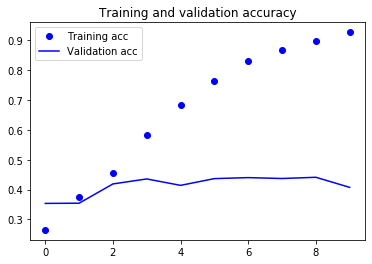

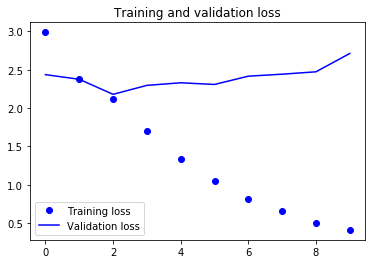

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()